In [2]:
from modules.validator import Validator
from modules.eda_class_native import run_eda, standardize_runs_df, df_runid_summary #, Validator
from modules.constants_settings import ConstantsSettings as CS
import pandas as pd
from modules.data_import import infer_source_files_technology, read_references_filter

In [2]:

METADATA_DIR = "benchmark_metadata/"
INTERMEDIATE_OUTPUT_DIR= "analysis_data/"
OUTPUT_DIR = "output/"
INPUT_DIR = "benchmark_data/"
technology= CS.TECHNOLOGY_minion # options minion, illumina_old


In [3]:

all_reports_file, all_parameters_file, all_references_file, validation_file= infer_source_files_technology(technology, INPUT_DIR, METADATA_DIR)
raw_refs= read_references_filter(all_references_file, benchmark_prefix="benchmark_batch")

## validation data
validator = Validator(validation_file, raw_refs)


### summary data
eda_runs = run_eda(validator, all_reports_file, all_parameters_file, 
                   INTERMEDIATE_OUTPUT_DIR)


### pre-processing
eda_runs.split()
eda_runs.combine_data()

full_data = eda_runs.combdat
dataset_success = eda_runs.get_combd_data_success()
sources = eda_runs.sources

combdat_full_process = standardize_runs_df(eda_runs.combdat) ##
run_assess = df_runid_summary(combdat_full_process, INTERMEDIATE_OUTPUT_DIR, technology=technology)


/home/bioinf/Desktop/INSA/Manuscript/Manuscript_TELEVIR/BENCHMARK_EDA/modules/eda_class_native.py:607: DtypeWarning: Columns (46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  combdat = pd.read_csv(self.combined_reports_path, sep="\t")


In [4]:

#####
### generate benchmark tree, calculate scores
from modules.benchmark_graph_utils import pipeline_tree, tree_plot

pipe_tree = pipeline_tree(INTERMEDIATE_OUTPUT_DIR)
pipe_tree.param_input(technology)
pipe_tree.create_pipe_tree()

inter_scores= pipe_tree.calculate_node_scores_with_source_subset_draw(
    eda_runs.softs, run_assess, cv= 100, subset=.7)



node_runs_df (2574, 2)


## Data Exploration




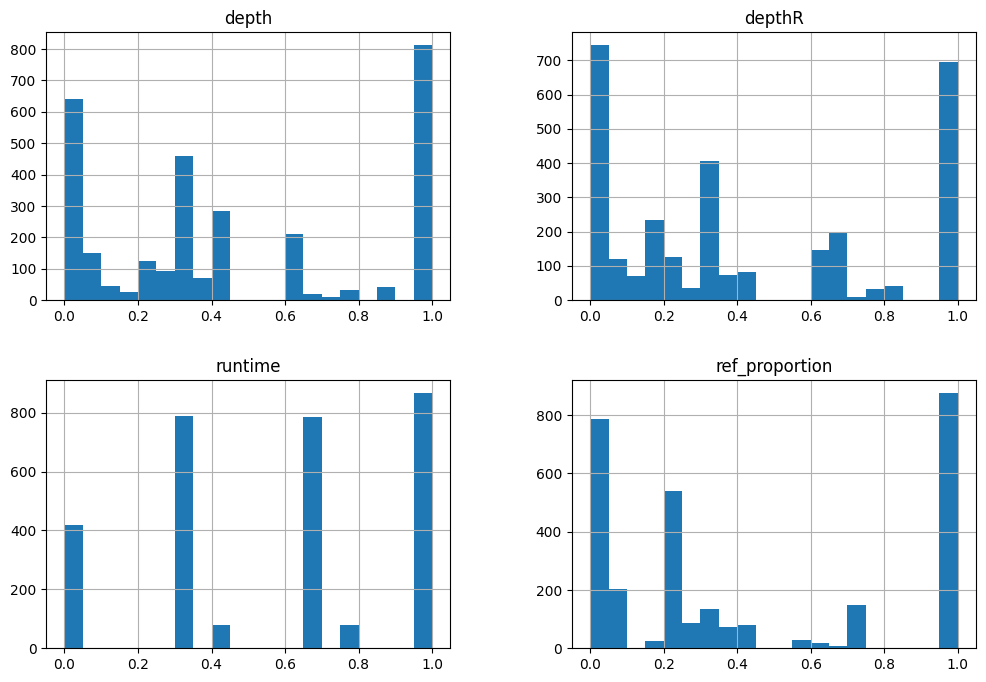

In [5]:
fig= run_assess[["depth", "depthR", "runtime", "ref_proportion"]].hist(figsize=(12,8), bins=20)

In [10]:
from modules.analysis_functions import benchmark_results_pca, plot_pipe_tree_pca, benchmark_scatterplot, plot_benchmark_corrs
pipe_tree_df_pca, loadings= benchmark_results_pca(pipe_tree)

print(loadings)

                     pca1      pca2      pca3      pca4
coverage        -0.212104  0.622301 -0.251938  0.441956
depth           -0.071953  0.244178 -0.091133  0.066897
depthR          -0.063809  0.219428 -0.090717  0.031041
complete        -0.068610  0.035456 -0.359871 -0.186226
ahelp           -0.132915  0.225737 -0.414029 -0.788036
rhelp            0.102536 -0.571823 -0.702368  0.279361
runtime         -0.949152 -0.291392  0.114863  0.018965
precision       -0.092575  0.157763 -0.318993  0.196973
ref_proportion  -0.055607  0.123955 -0.093012  0.159966
branch_coverage -0.017997  0.024723 -0.046295  0.027669


In [14]:
plot_pipe_tree_pca(pipe_tree_df_pca)

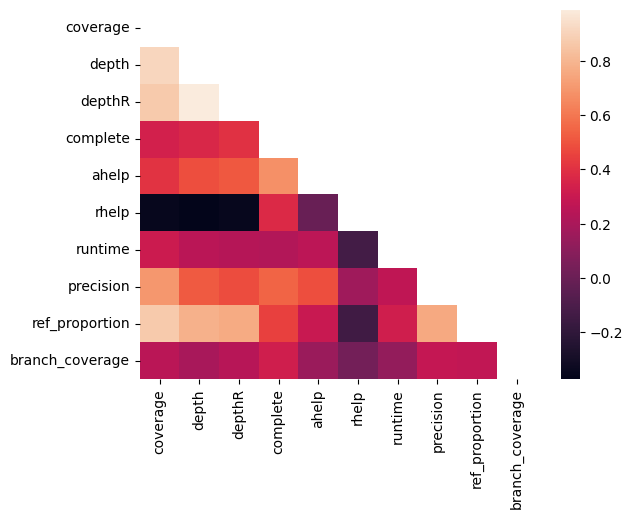

In [15]:
plot_benchmark_corrs(pipe_tree)

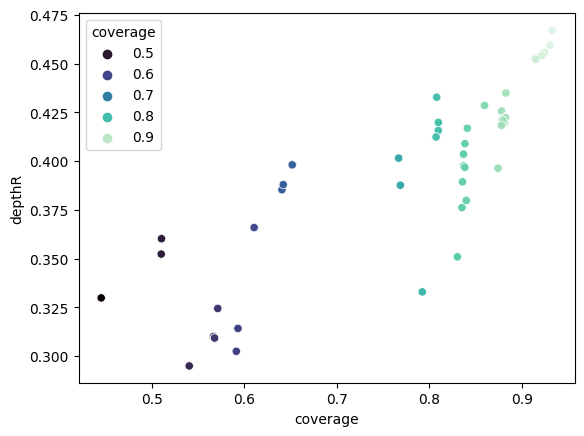

In [16]:
benchmark_scatterplot(pipe_tree, "coverage", "depthR", hue= "coverage")